<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/visualisasi_vxvy_30_edit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import joblib
import numpy as np
import pandas as pd

In [3]:
! unzip /content/models_vxvy_30_a01.zip

Archive:  /content/models_vxvy_30_a01.zip
replace content/models/model 4? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/models/model 4  
  inflating: content/models/model 20  
  inflating: content/models/model 3  
  inflating: content/models/model 6  
  inflating: content/models/model 21  
  inflating: content/models/model 27  
  inflating: content/models/model 1  
  inflating: content/models/model 7  
  inflating: content/models/model 22  
  inflating: content/models/model 2  
  inflating: content/models/model 8  
  inflating: content/models/model 0  
  inflating: content/models/model 25  
  inflating: content/models/model 16  
  inflating: content/models/model 13  
  inflating: content/models/model 19  
  inflating: content/models/model 17  
  inflating: content/models/model 18  
  inflating: content/models/model 9  
  inflating: content/models/model 24  
  inflating: content/models/model 23  
  inflating: content/models/model 29  
  inflating: content/models/model 12 

In [4]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx',sheet_name='label_30')

In [5]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

'''
def rescale(df,new_max,new_min):
  df = df *(new_max - new_min) + new_min
  return df
'''

from sklearn.preprocessing import StandardScaler
def standard(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  return df

def rescale(df,df2):
  new_max = df2.max()
  new_min = df2.min()
  df = (df)*(new_max - new_min) + new_min
  return df

In [6]:
feature = norm(feature)

In [7]:
array_y = []
array_y_not_normal = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  array_y_not_normal.append(frame)
  frame = norm(frame)
  array_y.append(frame)

In [8]:
a = round(rescale(array_y[0],array_y_not_normal[0]),9)

In [9]:
a.describe() == array_y_not_normal[0].describe()

,Vx,Vy
count,True,True
mean,True,True
std,True,True
min,True,True
25%,True,True
50%,True,True
75%,True,True
max,True,True


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [11]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [12]:
y.shape,y_predict.shape

((30, 192, 2), (30, 192, 2))

In [13]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
indexing = 0,1
for i in range(192):
  a = y[...,i,indexing]
  b = y_predict[...,i,indexing]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [14]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [15]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,0.504730,0.126113,0.032574
std,0.375230,0.057426,0.027504
min,-0.564046,0.065059,0.006957
25%,0.222766,0.077133,0.010106
50%,0.770653,0.085647,0.013971
75%,0.804489,0.181934,0.056582
max,0.858454,0.272484,0.117673


In [16]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
105,0.858454,0.065059,0.006957


In [17]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
41,-0.564046,0.167319,0.080608


In [18]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

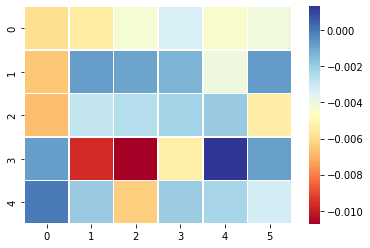

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

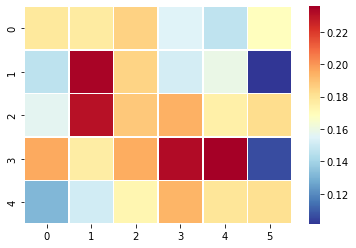

In [20]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

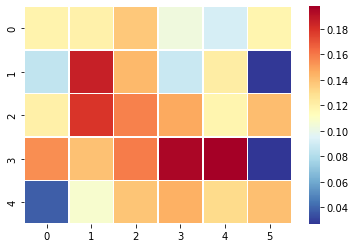

In [21]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [22]:
#_________break__________

In [23]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_30_aktual')

In [24]:
y.shape

(30, 192, 2)

In [25]:
np.array(array_y_not_normal).shape

(30, 192, 2)

In [26]:
len(array_y_not_normal) == len(y)

True

In [27]:
df_y = []
df_y_predict = []
for i in range(30):
  q = pd.DataFrame(y[i],columns=['Vx','Vy'])
  q = round(rescale(q,array_y_not_normal[i]),9)
  df_y.append(q)
  r = round(pd.DataFrame(y_predict[i],columns=['Vx','Vy']),9)
  r = rescale(r,array_y_not_normal[i])
  df_y_predict.append(r)

In [28]:
np.array(df_y).shape 

(30, 192, 2)

In [29]:
#array_y_not_normal[0]

In [30]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [31]:
a = kec_angin(np.array(df_y),105)
a.drop(['koor_x','koor_y'],axis=1)

,Vx,Vy
0,-0.004354,-0.146077
1,-0.003327,-0.166619
2,-0.002958,-0.164406
3,-0.002696,-0.159758
4,-0.002494,-0.158204
5,-0.001957,-0.159414
6,0.010115,-0.004854
7,0.017328,-0.002954
8,0.022781,-0.002826
9,0.025468,-0.001754


In [32]:
b = kec_angin(np.array(df_y_predict),105)
b.drop(['koor_x','koor_y'],axis=1)

,Vx,Vy
0,0.001451,-0.071568
1,0.003139,-0.022586
2,0.003656,0.006629
3,0.003180,-0.027220
4,0.004286,-0.079052
5,0.002725,-0.114764
6,-0.000173,0.003698
7,-0.021341,-0.023122
8,-0.008281,-0.024838
9,0.018752,-0.000343


In [33]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
indexing = 0,1
for i in range(192):
  a = kec_angin(np.array(df_y),i)
  a.drop(['koor_x','koor_y'],axis=1)
  b = kec_angin(np.array(df_y_predict),i)
  b.drop(['koor_x','koor_y'],axis=1)
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [43]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,-3.609717,0.016466,0.001573
std,14.656351,0.008232,0.001694
min,-92.890674,0.008293,0.000300
25%,-0.478320,0.009635,0.000363
50%,0.357210,0.012214,0.000809
75%,0.588336,0.023346,0.002067
max,0.725026,0.036447,0.007283


In [35]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
171,0.725026,0.018408,0.001172


In [36]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
9,-92.890674,0.009759,0.000341


In [37]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver

def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [38]:
from numpy.ma.core import sqrt
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np
def tampilan_vektor_heatmap(Y):
  x = Y['koor_x']
  y = Y['koor_y']
  a = Y['Vx']
  b = Y['Vy']
  angle = np.arctan(b / a)
  norm = 0.5
  u = norm * np.cos(angle)
  v = norm * np.sin(angle)
  f = ff.create_quiver(x, y, u, v, scale = 1, scaleratio = 0.5)
  trace1 = f.data[0]
  trace2 = go.Contour(
       x = (x*1.2)-0.5,
       y = (y*1.2)-0.5,
       z = ((a**2)*(b**2))**0.5
   )
  data=[trace1,trace2]
  fig = go.FigureWidget(data)
  fig.show()

In [39]:
scenarios=171
angin_test = kec_angin(np.array(df_y),scenarios)
angin_pred = kec_angin(np.array(df_y_predict),scenarios)

In [40]:
tampilan_vektor_heatmap(angin_test)

In [41]:
tampilan_vektor_heatmap(angin_pred)